In [2]:
import numpy as np

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import umap


In [3]:
digits = load_digits()

reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0.5, 1.0, 'UMAP projection of the Digits dataset')

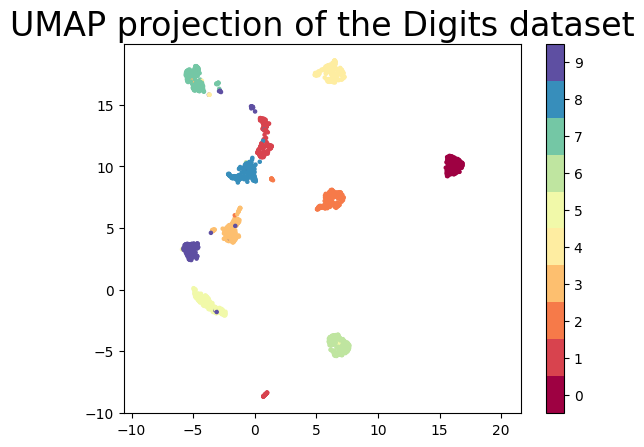

In [4]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap="Spectral", s=5)
plt.gca().set_aspect("equal", "datalim")
plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title("UMAP projection of the Digits dataset", fontsize=24)


In [5]:
import polars as pl
from pathlib import Path


In [6]:
def select_cols(num_cols: int) -> list[pl.Expr]:
    return list(map(lambda i: pl.col(f"column_{i}"), range(num_cols)))


In [7]:
data_path = Path("/home/shinsei/MyResearches/feat_extrc/reports/features/SimpleCAE32/2023-07-10/13-09-32/feature_train_data_clustering.csv")
df = pl.read_csv(data_path)
n_lf = 128
X = df.select(select_cols(n_lf))
sample_nums = df.select(["dirname"]).to_numpy().flatten()
local_structure_clusters = df.select(["cluster"]).to_numpy().flatten()


In [8]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)


In [9]:
reducer_default = umap.UMAP(
    n_components=3,
    random_state=42,
    n_jobs=1,
    metric="manhattan"
)
X_emb = reducer_default.fit_transform(X)


In [ ]:
reducer_default = umap.UMAP(
    n_components=3,
    random_state=42,
    n_jobs=1,
    metric="manhattan"
)
X_emb = reducer_default.fit_transform(X)


In [10]:
reducer_std = umap.UMAP(
    n_components=3,
    random_state=42,
    n_jobs=1,
    metric="manhattan"
)
X_std_emb = reducer_std.fit_transform(X_std)


Text(0.5, 1.0, 'standardized data')

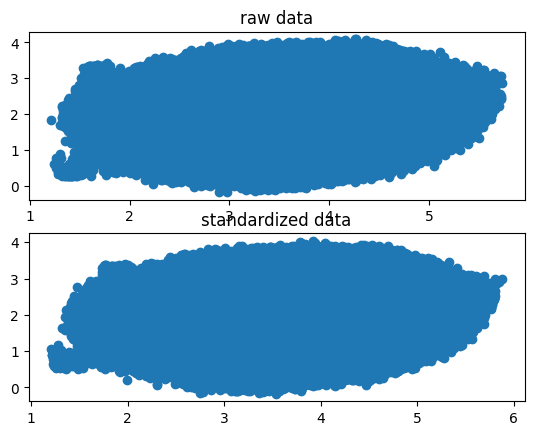

In [11]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.scatter(X_std_emb[:, 0], X_std_emb[:, 1])
ax.set_title("raw data")

ax = fig.add_subplot(212)
plt.scatter(X_emb[:, 0], X_emb[:, 1])
ax.set_title("standardized data")


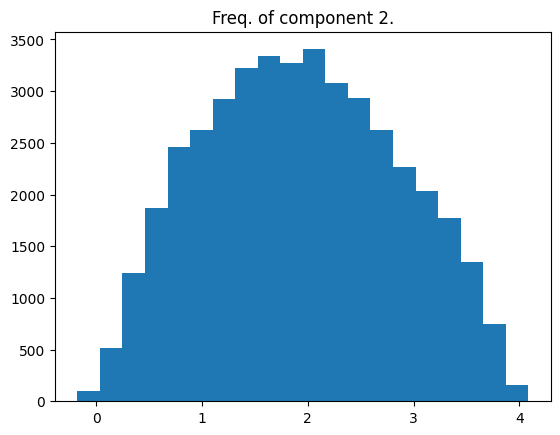

In [12]:
plt.hist(X_std_emb[:, 1], bins=20)
plt.title("Freq. of component 2.")
plt.show()


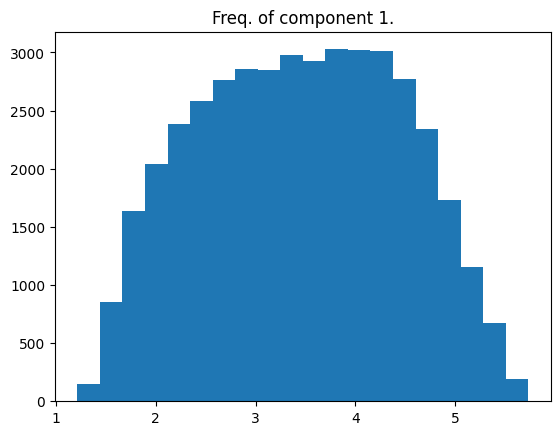

In [13]:
plt.hist(X_std_emb[:, 0], bins=20)
plt.title("Freq. of component 1.")
plt.show()


In [14]:
colors = plt.get_cmap("tab10")


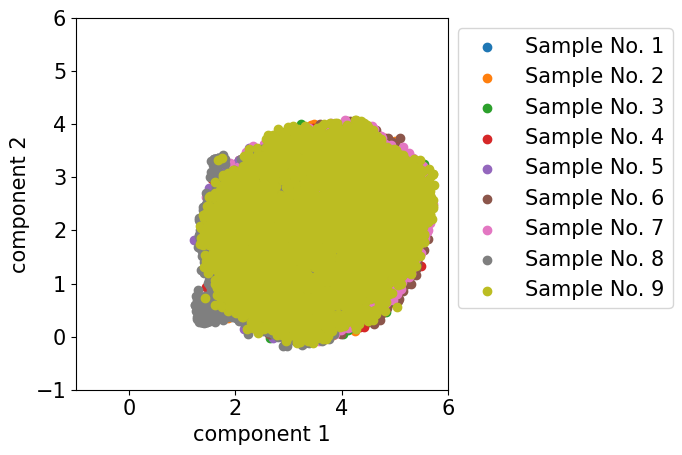

In [15]:
plt.rcParams["font.size"] = 15
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for sample_num in np.unique( sample_nums ):
    ax.scatter(
        X_std_emb[sample_nums==sample_num, 0],
        X_std_emb[sample_nums==sample_num, 1],
        color = colors(sample_num),
        label = f"Sample No. {sample_num+1}"
    )
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
ax.set_aspect("equal")
fig.tight_layout()
plt.show()


<class 'numpy.ndarray'>
[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]


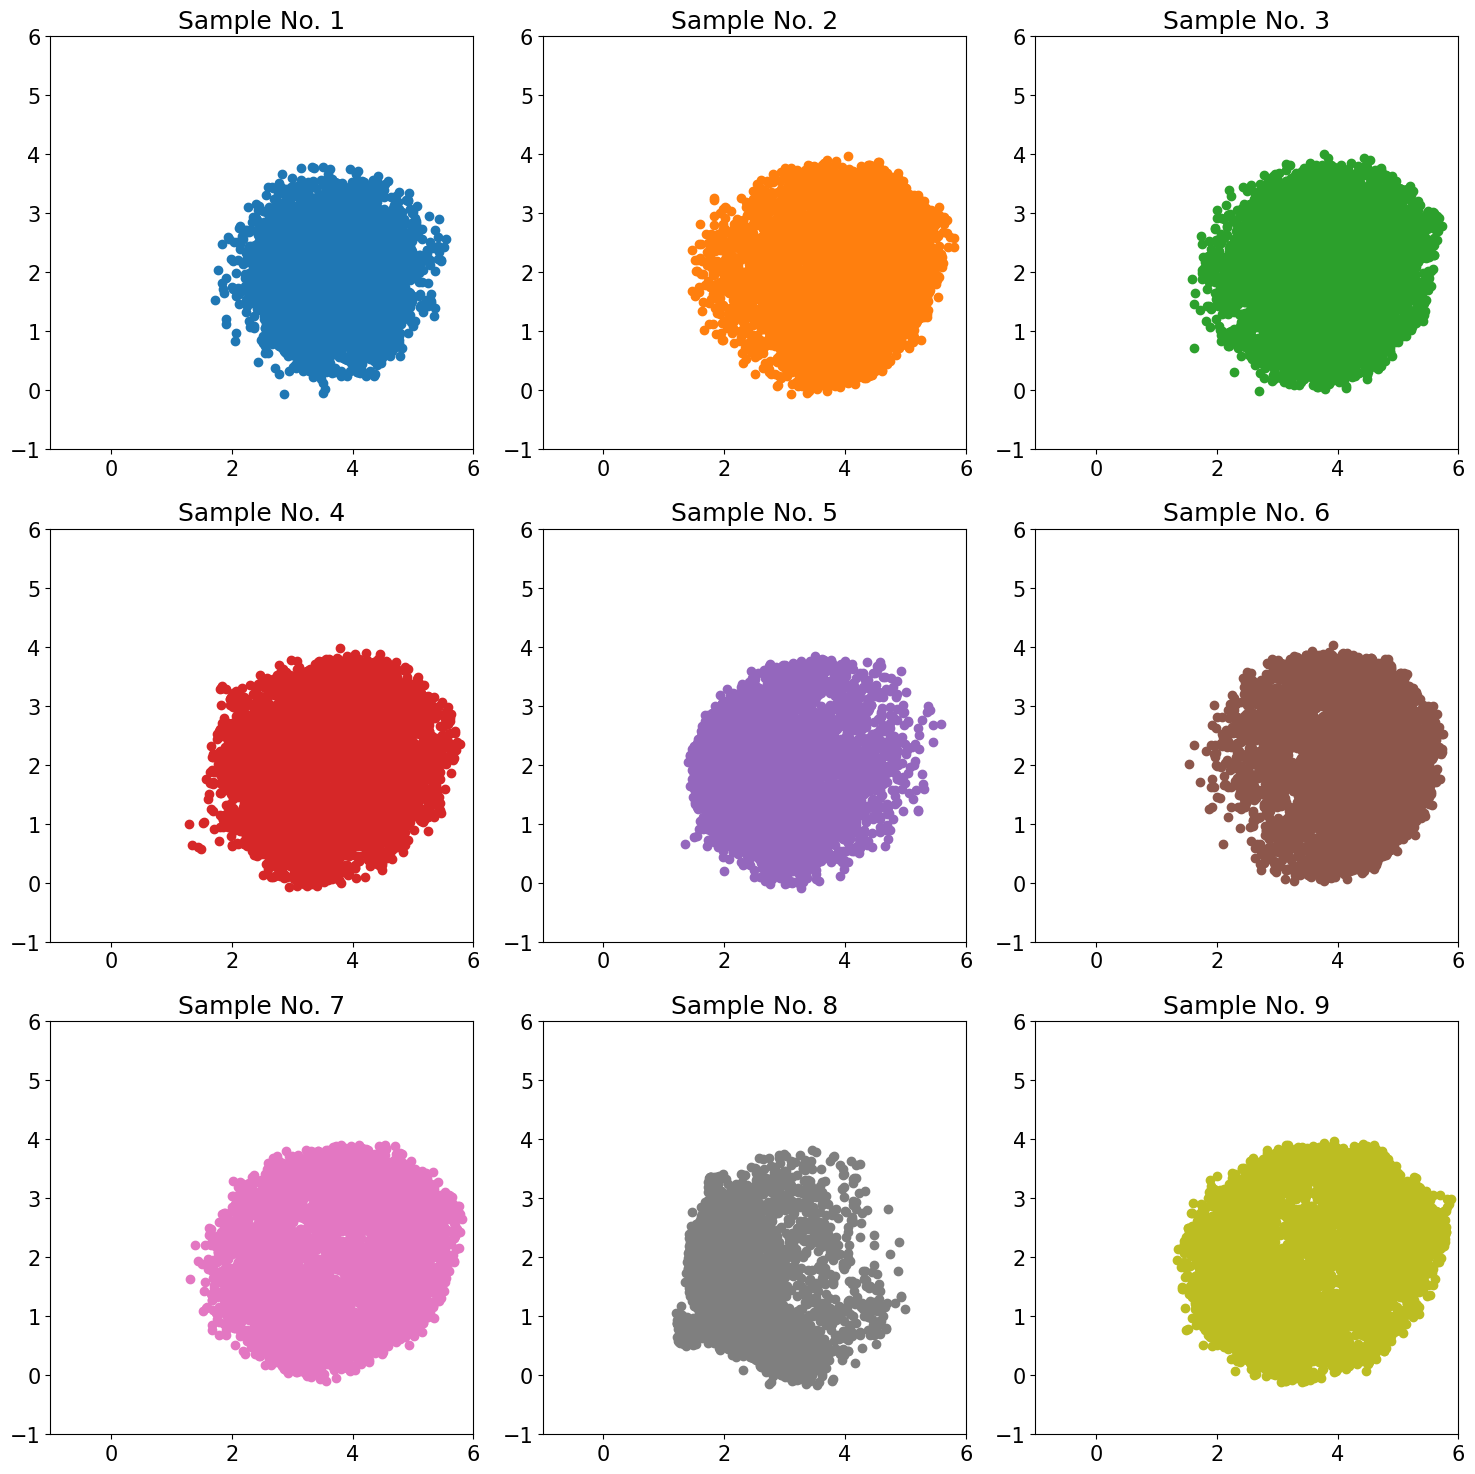

In [16]:
fig = plt.figure(figsize=(15,15))
# axes = fig.add_subplot(2,5,1)
axes = fig.subplots(3,3,)
# axes = fig.subplots(2,5, sharey=True)
print(type(axes))
print(axes)
for sample_num in np.unique(sample_nums):
    axes[sample_num // 3, sample_num % 3].set_title(f"Sample No. {sample_num+1}")
    axes[sample_num // 3, sample_num % 3].scatter(X_emb[sample_nums==sample_num, 0], X_emb[sample_nums==sample_num, 1], label=sample_num, color=colors(sample_num))
    axes[sample_num // 3, sample_num % 3].set_xlim(-1, 6)
    axes[sample_num // 3, sample_num % 3].set_ylim(-1, 6)
    # ax.legend()

fig.tight_layout()
plt.show()
